# Pre

In [2]:
from __future__ import annotations
# %pip uninstall mediocreatbest
%pip install --upgrade --force-reinstall \
    mediocreatbest@git+https://gist.github.com/player1537/3457b026ed6ef6696d758517f55a58df.git
try:
    from mediocreatbest import auto
except ImportError:
    %pip install --quiet --upgrade pip
    %pip install --upgrade --force-reinstall \
        mediocreatbest@git+https://gist.github.com/player1537/3457b026ed6ef6696d758517f55a58df.git
    from mediocreatbest import auto

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://gist.github.com/player1537/3457b026ed6ef6696d758517f55a58df.git to /tmp/pip-install-tj5z5f23/mediocreatbest_74ba8b346ba24fef85e5d5dbb057eedb
  Running command git clone --filter=blob:none --quiet https://gist.github.com/player1537/3457b026ed6ef6696d758517f55a58df.git /tmp/pip-install-tj5z5f23/mediocreatbest_74ba8b346ba24fef85e5d5dbb057eedb
  Resolved https://gist.github.com/player1537/3457b026ed6ef6696d758517f55a58df.git to commit e41d8d653f5889dd403fed60135cfcf0de585704
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mediocreatbest: filename=mediocreatbest-0.2.33-py3-none-any.whl size=16365 sha256=8e38430aff479f412dc9d7b1a2b13a46cb224afed3623fffce75651350e4665f
  Stored in directory: /tmp/pip-ephem-wheel-cache-vv0z76no/wheels/cc/6d/dd/d4137c3485df0cb8773c136ecc231252590bf217127892aaa5


# Config

In [3]:
config = auto.types.SimpleNamespace()

/auto.pprint.pp config width=144

namespace()


# Lib

## Address to lat/lng

In [4]:
from opencage.geocoder import OpenCageGeocode
def dms_to_decimal(dms_str):
    # Regular expression to parse the DMS format
    match = auto.re.match(r"(\d+)° (\d+)' ([\d.]+)'' ([NSEW])", dms_str)
    if not match:
        raise ValueError("Invalid DMS format")

    degrees = int(match.group(1))
    minutes = int(match.group(2))
    seconds = float(match.group(3))
    direction = match.group(4)

    # Convert to decimal degrees
    decimal_degrees = degrees + minutes / 60 + seconds / 3600

    # Adjust sign for South and West
    if direction in 'SW':
        decimal_degrees *= -1

    return decimal_degrees

def addr_to_coords(addr: str) -> (float, float):
    API_KEY = '6cda2bcd35394349886014d2a5c6f497'
    geocoder = auto.opencage.geocoder.OpenCageGeocode(API_KEY)

    data = geocoder.geocode(addr)[0]
    lat = data['annotations']['DMS']['lat']
    lng = data['annotations']['DMS']['lng']
    lat = dms_to_decimal(lat)
    lng = dms_to_decimal(lng)
    return (lat, lng)

def scope():
    print(addr_to_coords('8000 Middlebrook Pike Knoxville TN'))

/scope

(35.943011, -84.05265299999999)


## Lat/lng from point with radius & direction

In [5]:
def get_point_at_distance(lat, lon, distance_miles, bearing_degrees):
    """
    Calculate a new coordinate point given:
    - Starting point (latitude, longitude)
    - Distance in miles
    - Bearing in degrees (0° is North, 90° is East, etc.)
    
    Returns: (new_latitude, new_longitude)
    """
    # Convert to radians
    lat_rad = auto.math.radians(lat)
    lon_rad = auto.math.radians(lon)
    bearing_rad = auto.math.radians(bearing_degrees)
    
    # Earth's radius in miles
    R = 3959
    
    # Calculate angular distance
    d = distance_miles / R
    
    # Calculate new latitude
    new_lat_rad = auto.math.asin(
        auto.math.sin(lat_rad) * auto.math.cos(d) +
        auto.math.cos(lat_rad) * auto.math.sin(d) * auto.math.cos(bearing_rad)
    )
    
    # Calculate new longitude
    new_lon_rad = lon_rad + auto.math.atan2(
        auto.math.sin(bearing_rad) * auto.math.sin(d) * auto.math.cos(lat_rad),
        auto.math.cos(d) - auto.math.sin(lat_rad) * auto.math.sin(new_lat_rad)
    )
    
    # Convert back to degrees
    new_lat = auto.math.degrees(new_lat_rad)
    new_lon = auto.math.degrees(new_lon_rad)
    
    return (new_lat, new_lon)

def scope():
    lat, lng = addr_to_coords('8000 Middlebrook Pike Knoxville TN')
    newpoint_north = get_point_at_distance(lat, lng, 1.0, 0.0)
    print((lat, lng))
    print(newpoint_north)

/scope

(35.943011, -84.05265299999999)
(35.957483285807804, -84.05265299999999)


# Background

## Config

In [272]:
# config.address: str = "8000 Middlebrook Pike Knoxville TN"
config.address: str = "1131 West Nokomis Circle Knoxville TN"
config.radius: float = 0.05

config.mapbox = auto.types.SimpleNamespace()
config.mapbox.token = 'pk.eyJ1IjoicmF1c3RpbjkiLCJhIjoiY2x3Zmg1d2psMXRlMDJubW5uMDI1b2VkbSJ9.jB4iAzkxNFa8tRo5SrawGA'
config.mapbox.style = 'dark-v11'


config.app = auto.types.SimpleNamespace()
config.app.satellite = (
    # 'https://api.mapbox.com/styles/v1/mapbox/dark-v11/tiles/{z}/{y}/{x}?access_token=pk.eyJ1IjoicmF1c3RpbjkiLCJhIjoiY2x3Zmg1d2psMXRlMDJubW5uMDI1b2VkbSJ9.jB4iAzkxNFa8tRo5SrawGA'
    'https://api.mapbox.com/styles/v1/mapbox/satellite-streets-v12/tiles/{z}/{y}/{x}?access_token=pk.eyJ1IjoicmF1c3RpbjkiLCJhIjoiY2x3Zmg1d2psMXRlMDJubW5uMDI1b2VkbSJ9.jB4iAzkxNFa8tRo5SrawGA'
    # 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
)

### Satellite

In [212]:
try:
    _Satellite__12b18eaa
except NameError:
    _Satellite__12b18eaa = {}

#@title Satellite
class Satellite:
    was_cached = None

    def __new__(Satellite, *, row: int, col: int, zoom: int) -> auto.PIL.Image:
        return Satellite.from_disk(row=row, col=col, zoom=zoom)

    @staticmethod
    def Tile(url: str, /) -> tuple[int, int, int]:
        path = auto.pathlib.PurePosixPath(url)
        col = int(path.name)
        path = path.parent
        row = int(path.name)
        path = path.parent
        zoom = int(path.name)

        return zoom, row, col

    @classmethod
    def load(Satellite, zpath: auto.os.PathLike, /):
        zpath = auto.pathlib.Path(zpath)
        with auto.zipfile.ZipFile(zpath, 'r') as arc:
            for name in arc.namelist():
                path = auto.zipfile.Path(arc, name)
                if path.is_dir():
                    continue

                zoom, row, col = Satellite.Tile(str(path.parent))
                with path.open('rb') as f:
                    image = auto.PIL.Image.open(f)
                    image.load()

                __12b18eaa[str(path.parent)] = image

    @classmethod
    def save(Satellite, zpath: auto.os.PathLike, /):
        zpath = auto.pathlib.Path(zpath)
        if zpath.exists():
            ztemp = zpath.parent / f'{zpath.name}.tmp'
            if ztemp.exists():
                ztemp.unlink()
            
            zpath.rename(ztemp)

        with auto.zipfile.ZipFile(zpath, 'w') as arc:
            root = auto.zipfile.Path(arc)

            for url, image in __12b18eaa.items():
                zoom, row, col = Satellite.Tile(url)

                with (path := root / f'{zoom}' / f'{row}' / f'{col}' / f'256.png').open('wb') as f:
                    image.save(f, 'PNG')

        print(f'Wrote {zpath.stat().st_size:,d} bytes to {zpath}')

    @classmethod
    def from_disk(Satellite, *, row: int, col: int, zoom: int) -> auto.PIL.Image:
        root = auto.zipfile.Path('data/tiles/satellite.zip')
        # root = auto.zipfile.Path('/mnt/seenas2/data/2023_ORNL_Building_Energy_Models/gen/satellite.zip')
        path = root / f'{zoom}' / f'{row}' / f'{col}' / f'256.png'
        if not path.exists():
            Satellite.was_cached = False
            image = Satellite.from_http(row=row, col=col, zoom=zoom)
            with path.open('wb') as f:
                image.save(f, 'PNG')

        else:
            Satellite.was_cached = True
            with path.open('rb') as f:
                image = auto.PIL.Image.open(f)
                image.load()

        return image

    @classmethod
    def from_http(Satellite, *, row: int, col: int, zoom: int) -> auto.PIL.Image:
        url = config.app.satellite.format(z=zoom, x=col, y=row)
        if url not in __12b18eaa:
            Satellite.was_cached = False

            with auto.requests.request(
                'GET',
                url,
                stream=True,
            ) as response:
                response.raise_for_status()

                image = auto.PIL.Image.open(auto.io.BytesIO(response.content))
                image.load()

            /auto.time.sleep 1
            __12b18eaa[url] = image

        else:
            Satellite.was_cached = True
            image = __12b18eaa[url]

        return image.convert('RGB')


def scope(args: str, /):
    parser = auto.argparse.ArgumentParser()
    args = parser.parse_args(auto.shlex.split(args))

    _Satellite__12b18eaa.clear()

    # Satellite.load(
    #     'data/__ac3095cf.zip',
    # )

    Satellite.load(
        'data/tiles/satellite.zip',
    )

    # Satellite.save(
    #     'data/tiles/satellite.zip',
    # )

;scope


## Test

### Bounds

In [81]:
def get_bounding_box(lat, lon, radius_miles):
    """
    Calculate the bounding box coordinates for a given center point and radius.
    
    Args:
        lat (float): Latitude of center point in degrees
        lon (float): Longitude of center point in degrees
        radius_miles (float): Radius in miles
        
    Returns:
        tuple: (min_lat, max_lat, min_lon, max_lon) in degrees
    """
    # Earth's radius in miles
    EARTH_RADIUS = 3959
    
    # Convert latitude/longitude to radians
    lat_rad = auto.math.radians(lat)
    lon_rad = auto.math.radians(lon)
    
    # Angular distance in radians on a great circle
    angular_distance = radius_miles / EARTH_RADIUS
    
    # Calculate min and max latitudes
    min_lat = lat_rad - angular_distance
    max_lat = lat_rad + angular_distance
    
    # Calculate min and max longitudes
    # This takes into account that degrees longitude get smaller as we move away from the equator
    delta_lon = auto.math.asin(auto.math.sin(angular_distance) / auto.math.cos(lat_rad))
    min_lon = lon_rad - delta_lon
    max_lon = lon_rad + delta_lon
    
    # Convert back to degrees
    min_lat = auto.math.degrees(min_lat)
    max_lat = auto.math.degrees(max_lat)
    min_lon = auto.math.degrees(min_lon)
    max_lon = auto.math.degrees(max_lon)
    
    return (min_lat, max_lat, min_lon, max_lon)


## Tiles

In [275]:
import math
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.image as mpimg

class GeoTileCalculator:
    def __init__(self, latitude: float, longitude: float):
        """
        Initialize with a center point latitude and longitude.
        
        Args:
            latitude (float): Latitude in degrees
            longitude (float): Longitude in degrees
        """
        self.lat = latitude
        self.lon = longitude
        
    def _degrees_to_radians(self, degrees: float) -> float:
        """Convert degrees to radians."""
        return degrees * (math.pi / 180.0)
    
    def _radians_to_degrees(self, radians: float) -> float:
        """Convert radians to degrees."""
        return radians * (180.0 / math.pi)
    
    def calculate_zoom_level(self, radius_miles: float) -> int:
        """
        Calculate appropriate zoom level based on radius.
        
        Args:
            radius_miles (float): Radius in miles
            
        Returns:
            int: Zoom level
        """
        ZOOM_SCALES = {
            0: 12000,  # World view
            2: 6000,   # Continent
            4: 3000,   # Country
            6: 1000,   # Large state
            8: 250,    # Small state
            10: 60,    # City
            12: 15,    # District
            14: 4,     # Neighborhood
            16: 1,     # Street
            18: 0.25,  # Building
            19: 0.10,
            20: 0.05
        }
        
        for zoom, scale in reversed(sorted(ZOOM_SCALES.items(), key=lambda x: -x[0])):
            if radius_miles > scale:
                print(f'Found radius: {radius_miles} -> {scale}')
                return max(0, zoom - 1)
        
        return 20
    
    def get_bounding_box(self, radius_miles: float) -> Tuple[float, float, float, float]:
        """
        Calculate the bounding box for a given radius around the center point.
        
        Args:
            radius_miles (float): Radius in miles
            
        Returns:
            Tuple[float, float, float, float]: (min_lat, max_lat, min_lon, max_lon)
        """
        EARTH_RADIUS = 3959
        
        lat_rad = self._degrees_to_radians(self.lat)
        lon_rad = self._degrees_to_radians(self.lon)
        
        angular_distance = radius_miles / EARTH_RADIUS
        
        min_lat = lat_rad - angular_distance
        max_lat = lat_rad + angular_distance
        
        delta_lon = math.asin(math.sin(angular_distance) / math.cos(lat_rad))
        min_lon = lon_rad - delta_lon
        max_lon = lon_rad + delta_lon
        
        return (
            self._radians_to_degrees(min_lat),
            self._radians_to_degrees(max_lat),
            self._radians_to_degrees(min_lon),
            self._radians_to_degrees(max_lon)
        )
    
    def _lat_lon_to_tile(self, lat: float, lon: float, zoom: int) -> Tuple[int, int]:
        """Convert latitude/longitude to tile coordinates."""
        lat_rad = self._degrees_to_radians(lat)
        n = 2.0 ** zoom
        x = int((lon + 180.0) / 360.0 * n)
        y = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
        return (x, y)
    
    def _tile_to_lat_lon(self, x: int, y: int, zoom: int) -> Tuple[float, float, float, float]:
        """
        Convert tile coordinates to lat/lon bounds.
        
        Returns:
            Tuple[float, float, float, float]: (min_lat, max_lat, min_lon, max_lon)
        """
        n = 2.0 ** zoom
        min_lon = x * 360.0 / n - 180.0
        max_lon = (x + 1) * 360.0 / n - 180.0
        
        min_lat = self._radians_to_degrees(
            math.atan(math.sinh(math.pi * (1 - 2 * (y + 1) / n))))
        max_lat = self._radians_to_degrees(
            math.atan(math.sinh(math.pi * (1 - 2 * y / n))))
        
        return (min_lat, max_lat, min_lon, max_lon)
    
    def get_covering_tiles(self, radius_miles: float, zoom: int = None) -> List[Tuple[int, int, int]]:
        """Get all Mapbox tiles that cover the area within the specified radius."""
        if zoom is None:
            zoom = self.calculate_zoom_level(radius_miles)
            
        min_lat, max_lat, min_lon, max_lon = self.get_bounding_box(radius_miles)
        
        min_tile = self._lat_lon_to_tile(min_lat, min_lon, zoom)
        max_tile = self._lat_lon_to_tile(max_lat, max_lon, zoom)
        
        tiles = []
        for x in range(min_tile[0], max_tile[0] + 1):
            for y in range(max_tile[1], min_tile[1] + 1):
                tiles.append((x, y, zoom))
                
        return tiles
    
    def _get_tile_image(self, image_dict: dict, x: int, y: int, z: int) -> Optional[np.ndarray]:
        """
        Get the image array for a specific tile.
        
        Args:
            image_dict (dict): Dictionary mapping tile coordinates to image paths/arrays
            x (int): Tile x coordinate
            y (int): Tile y coordinate
            z (int): Zoom level
            
        Returns:
            Optional[np.ndarray]: Image array or None if image not found
        """
        key = (x, y, z)
        if key not in image_dict:
            return None
            
        img_data = image_dict[key]
        
        # If the image is a path string
        if isinstance(img_data, str):
            try:
                return plt.imread(img_data)
            except Exception as e:
                print(f"Error loading image for tile {key}: {e}")
                return None
                
        # If the image is already a numpy array
        elif isinstance(img_data, np.ndarray):
            return img_data
            
        # If the image is a PIL Image
        elif isinstance(img_data, Image.Image):
            return np.array(img_data)
            
        return None
    
    def plot_tiles(self, radius_miles: float, tile_images: dict = None, 
                  zoom: int = None, figsize: Tuple[int, int] = (10, 10),
                  show_tile_bounds: bool = True, polygons: List[dict] = None) -> None:
        """
        Create a matplotlib plot showing the tiles that cover the specified area.
        
        Args:
            radius_miles (float): Radius in miles
            tile_images (dict): Dictionary mapping (x,y,z) tuples to image paths or arrays
            zoom (int, optional): Override the automatic zoom level calculation
            figsize (Tuple[int, int], optional): Figure size in inches
            show_tile_bounds (bool): Whether to show tile boundaries
            polygons (List[dict]): List of dictionaries containing polygon information.
                Each dict should have:
                - 'coordinates': List of (lon, lat) tuples defining the polygon
                - 'color': Color for filling the polygon (default 'red')
                - 'alpha': Transparency value (default 0.3)
                - 'label': Label for the legend (optional)
        """
        # Get tiles and bounding box
        tiles = self.get_covering_tiles(radius_miles, zoom)
        min_lat, max_lat, min_lon, max_lon = self.get_bounding_box(radius_miles)
        
        # Create figure and axis
        fig, ax = plt.subplots(figsize=figsize)
        
        # Plot each tile
        for x, y, z in tiles:
            tile_min_lat, tile_max_lat, tile_min_lon, tile_max_lon = self._tile_to_lat_lon(x, y, z)
            
            # Display tile image if available
            if tile_images is not None:
                img_array = self._get_tile_image(tile_images, x, y, z)
                if img_array is not None:
                    ax.imshow(img_array, 
                             extent=[tile_min_lon, tile_max_lon, 
                                    tile_min_lat, tile_max_lat],
                             origin='upper',
                             aspect='auto')
            
            if show_tile_bounds:
                # Create rectangle for tile boundary
                rect = Rectangle(
                    (tile_min_lon, tile_min_lat),
                    tile_max_lon - tile_min_lon,
                    tile_max_lat - tile_min_lat,
                    fill=False,
                    edgecolor='yellow' if tile_images else 'blue',
                    alpha=0.5,
                    linewidth=1
                )
                ax.add_patch(rect)
                
                # Add tile coordinates text
                ax.text(
                    (tile_min_lon + tile_max_lon) / 2,
                    (tile_min_lat + tile_max_lat) / 2,
                    f'({x},{y})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=8,
                    color='black',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='yellow', pad=1)
                )
        
        # Plot polygons if provided
        if polygons:
            for poly_dict in polygons:
                coords = poly_dict['coordinates']
                color = poly_dict.get('color', 'red')
                alpha = poly_dict.get('alpha', 0.3)
                label = poly_dict.get('label', None)
                
                # Convert coordinates to numpy array
                poly_coords = np.array(coords)
                
                # Create and add the polygon
                polygon = Polygon(
                    poly_coords,
                    facecolor=color,
                    alpha=alpha,
                    edgecolor=color,
                    label=label
                )
                ax.add_patch(polygon)
        
        # Plot center point
        ax.plot(self.lon, self.lat, 'r+', markersize=12, linewidth=2, label='Center')
        
        # Plot radius circle
        circle = Circle(
            (self.lon, self.lat),
            radius_miles / 69.0,
            fill=False,
            edgecolor='red',
            linestyle='--',
            alpha=0.7,
            linewidth=2,
            label='Radius'
        )
        ax.add_patch(circle)
        
        # Set plot limits with some padding
        pad = (max_lat - min_lat) * 0.1
        ax.set_xlim(min_lon - pad, max_lon + pad)
        ax.set_ylim(min_lat - pad, max_lat + pad)
        
        # Add labels and title
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Tile Coverage (Zoom Level {tiles[0][2]})')
        if show_tile_bounds and not tile_images:
            ax.grid(True, linestyle='--', alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Make sure aspect ratio is equal
        ax.set_aspect('equal')
        
        plt.tight_layout()
        plt.show()

  0%|          | 0/36 [00:00<?, ?it/s]

Tile (279716, 411995, 20)
Tile (279716, 411996, 20)
Tile (279716, 411997, 20)
Tile (279716, 411998, 20)
Tile (279716, 411999, 20)
Tile (279716, 412000, 20)
Tile (279717, 411995, 20)
Tile (279717, 411996, 20)
Tile (279717, 411997, 20)
Tile (279717, 411998, 20)
Tile (279717, 411999, 20)
Tile (279717, 412000, 20)
Tile (279718, 411995, 20)
Tile (279718, 411996, 20)
Tile (279718, 411997, 20)
Tile (279718, 411998, 20)
Tile (279718, 411999, 20)
Tile (279718, 412000, 20)
Tile (279719, 411995, 20)
Tile (279719, 411996, 20)
Tile (279719, 411997, 20)
Tile (279719, 411998, 20)
Tile (279719, 411999, 20)
Tile (279719, 412000, 20)
Tile (279720, 411995, 20)
Tile (279720, 411996, 20)
Tile (279720, 411997, 20)
Tile (279720, 411998, 20)
Tile (279720, 411999, 20)
Tile (279720, 412000, 20)
Tile (279721, 411995, 20)
Tile (279721, 411996, 20)
Tile (279721, 411997, 20)
Tile (279721, 411998, 20)
Tile (279721, 411999, 20)
Tile (279721, 412000, 20)


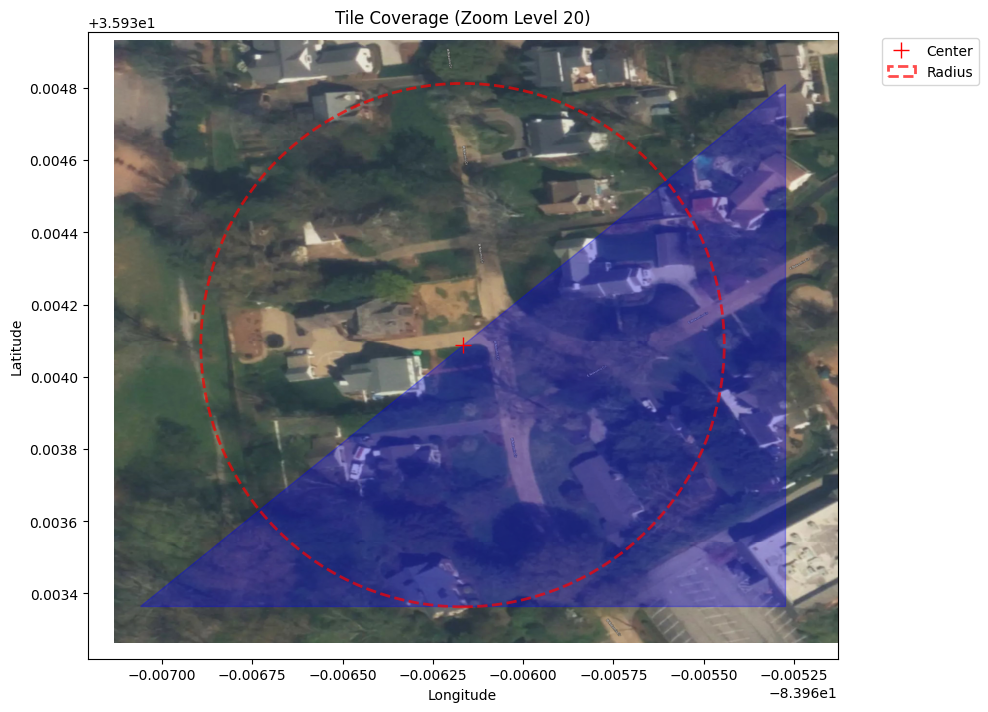

In [280]:
def scope():
    center_lat, center_lon = addr_to_coords(config.address)
    geo = GeoTileCalculator(center_lat, center_lon)

    tiles = geo.get_covering_tiles(radius_miles=config.radius)

    tile_data = {}
    for tile in auto.tqdm.auto.tqdm(tiles):
        print(f'Tile ({tile[0]}, {tile[1]}, {tile[2]})')
        img = Satellite.from_http(row=tile[0], col=tile[1], zoom=tile[2])
        tile_data[(tile[0], tile[1], tile[2])] = img
        # /display img

    bounds = geo.get_bounding_box(radius_miles=config.radius)
    geometry = [
        {
            'coordinates': [
                (bounds[2], bounds[0]),
                (bounds[3], bounds[0]),
                (bounds[3], bounds[1]),
            ],
            'color': 'blue',
            'alpha': 0.3,
            'label': ''
        },
    ]
    geo.plot_tiles(radius_miles=config.radius, tile_images=tile_data, show_tile_bounds=False, polygons=geometry)

/scope